# Combining and exploring all Spotify datasets

In this notebook, I finally merge my custom, cleaned "Spotify Top 50 Charts (2017-2021, for 50 regions)" dataset (`top50.csv`) with the track metadata (`top50_track_data.csv`) and Spotify region metadata (`spotify_region_metadata.csv`) I collected. Let's inspect the quality of the data and see if we can identify some interesting patterns in it!

In [1]:
from helpers import get_data_path, create_data_out_path, ROOT_DIR, DATA_DIR
import pandas as pd
from ast import literal_eval

In [2]:
tracks = pd.read_csv(
    get_data_path("top50_track_data.csv"),
    index_col="id",
    dtype={"album_type": "category"},
    converters={"genres": literal_eval},
    parse_dates=["album_release_date"]
)

In [3]:
tracks

,explicit,name,preview_url,album_type,album_id,album_release_date,album_release_date_precision,isrc,isrc_year,isrc_agency,...,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,artist_name_1,artist_name_2,artist_name_3,genres
id,,,,,,,,,,,,,,,,,,,,,
000RW47rhEkSqjgTrZx7YX,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,day,BRRGE2010642,2020.0,Pro-música Brazil,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000xQL6tZNLJzIrtIgxqSl,False,Still Got Time (feat. PARTYNEXTDOOR),https://p.scdn.co/mp3-preview/83fad967740b8a85...,single,2kGUeTGnkLOYlinKRJe47G,2017-03-23,day,USRC11700675,2017.0,RIAA,...,120.963,188491.0,4.0,5ZsFI1h6hIdQRw2ti0hz81,2HPaUgqeutzr3jx5a9WyDV,NaN,ZAYN,PARTYNEXTDOOR,NaN,"[dance pop, pop, post-teen pop, uk pop, r&b, r..."
000xYdQfIZ4pDmBGzQalKU,False,"Eu, Você, O Mar e Ela",https://p.scdn.co/mp3-preview/ae0e943883e06623...,album,4QianJs5Ls4mxwcT7gDBww,2016-11-04,day,BRRGE1603547,2016.0,Pro-música Brazil,...,166.018,187119.0,4.0,3qvcCP2J0fWi0m0uQDUf6r,NaN,NaN,Luan Santana,NaN,NaN,"[arrocha, sertanejo, sertanejo pop, sertanejo ..."
001b8t3bYPfnabpjpfG1Y4,True,Geen Stof,https://p.scdn.co/mp3-preview/535320aa4cbc5811...,album,06v2EPzWTwcP0egTJVrPdU,2021-01-21,day,NLG662000948,2020.0,SENA,...,95.951,167866.0,4.0,1wFoE1RwBMWoWkXcFrCgsx,NaN,NaN,Josylvio,NaN,NaN,[dutch hip hop]
003VDDA7J3Xb2ZFlNx7nIZ,True,YELL OH,https://p.scdn.co/mp3-preview/14e659590d1a70cf...,single,2orYogfKeURqyS1hRP1vZ4,2020-02-07,day,QZJ842000061,2020.0,RIAA,...,74.496,236779.0,4.0,6Xgp2XMz1fhVYe7i6yNAax,50co4Is1HCEo8bhOyUWKpn,NaN,Trippie Redd,Young Thug,NaN,"[melodic rap, rap, trap, atl hip hop, atl trap..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zxphfIdUMOfZOAVpKFlld,True,Trapper Of The Year (Intro),https://p.scdn.co/mp3-preview/b48d68019fc66831...,single,65DP4VYecvLUlUVfCsXPLF,2021-11-19,day,SE6XY2184006,2021.0,IFPI Sweden,...,121.913,110164.0,4.0,2Dor6diK1zw9BEluKBOdoA,NaN,NaN,23,NaN,NaN,"[swedish drill, swedish hip hop, swedish trap ..."
7zyYmIdjqqiX6kLryb7QBx,False,以後別做朋友,https://p.scdn.co/mp3-preview/4d243321f0ec66ba...,album,1JEzXcEYuEFKKmo4mfMgC7,2014-12-19,day,TWA471410001,2014.0,RIT,...,130.576,260573.0,4.0,5fEQLwq1BWWQNR8GzhOIvi,NaN,NaN,Eric Chou,NaN,NaN,[mandopop]
7zyZ9yPXIQebb79PrMghpV,False,Zap Zum,https://p.scdn.co/mp3-preview/2f82c76f077fb377...,album,194szTkDIGJsa9iZJNStwN,2021-06-24,day,BCM112100037,2021.0,Pro-música Brazil,...,169.123,167503.0,4.0,6tzRZ39aZlNqlUzQlkuhDV,NaN,NaN,Pabllo Vittar,NaN,NaN,"[dance pop, funk carioca, funk pop, pop, pop l..."


In [4]:
charts = pd.read_csv(get_data_path("top50.csv"), index_col="id", parse_dates=["date"], dtype={"region": "category"})
charts

,region,date,rank,streams
id,,,,
6mICuAdrwEjh6Y6lroV2Kg,Argentina,2017-01-01,1,253019.0
7DM4BPaS7uofFul3ywMe46,Argentina,2017-01-01,2,223988.0
3AEZUABDXNtecAOSC1qTfo,Argentina,2017-01-01,3,210943.0
6rQSrBHf7HlZjtcMZ4S4bO,Argentina,2017-01-01,4,173865.0
58IL315gMSTD37DOZPJ2hf,Argentina,2017-01-01,5,153956.0
...,...,...,...,...
4aXicRG47bBEcKXlDaSRwW,Uruguay,2021-08-13,25,11431.0
43qcs9NpJhDxtG91zxFkj7,Uruguay,2021-08-13,27,10946.0
4M4DTyLupKvbJKlE4I4EYq,Uruguay,2021-08-13,33,9994.0


In [5]:
track_charts = charts.join(tracks)
track_charts

,region,date,rank,streams,explicit,name,preview_url,album_type,album_id,album_release_date,...,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,artist_name_1,artist_name_2,artist_name_3,genres
id,,,,,,,,,,,,,,,,,,,,,
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-23,14,548706.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-24,14,714162.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-25,15,587405.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-26,17,386706.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-27,19,387562.0,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,album,57h6WHDjwNGIs5NMeKYEoL,2021-04-22,...,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,Jorge & Mateus,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zzhknA0A39TH81meuX7WA,France,2019-12-08,34,95557.0,True,C'est pas des LOL,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,album,3Jtj1RlmKnRvBkp3YJWHXO,2019-10-04,...,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,Jul,NaN,NaN,"[francoton, rap marseille]"
7zzhknA0A39TH81meuX7WA,France,2019-12-09,33,100571.0,True,C'est pas des LOL,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,album,3Jtj1RlmKnRvBkp3YJWHXO,2019-10-04,...,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,Jul,NaN,NaN,"[francoton, rap marseille]"
7zzhknA0A39TH81meuX7WA,France,2019-12-10,36,95798.0,True,C'est pas des LOL,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,album,3Jtj1RlmKnRvBkp3YJWHXO,2019-10-04,...,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,Jul,NaN,NaN,"[francoton, rap marseille]"


In [6]:
columns_to_move = ["name", "artist_name_1", "artist_name_2", "artist_name_3"]
for col_name in reversed(columns_to_move):
  col = track_charts.pop(col_name)
  track_charts.insert(3, col_name, col)

In [7]:
track_charts

,region,date,rank,name,artist_name_1,artist_name_2,artist_name_3,streams,explicit,preview_url,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,genres
id,,,,,,,,,,,,,,,,,,,,,
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-23,14,Lance Individual,Jorge & Mateus,NaN,NaN,548706.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-24,14,Lance Individual,Jorge & Mateus,NaN,NaN,714162.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-25,15,Lance Individual,Jorge & Mateus,NaN,NaN,587405.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-26,17,Lance Individual,Jorge & Mateus,NaN,NaN,386706.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
000RW47rhEkSqjgTrZx7YX,Brazil,2021-04-27,19,Lance Individual,Jorge & Mateus,NaN,NaN,387562.0,False,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,...,0.0,0.075,0.962,117.399,164459.0,4.0,1elUiq4X7pxej6FRlrEzjM,NaN,NaN,"[arrocha, sertanejo, sertanejo universitario]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zzhknA0A39TH81meuX7WA,France,2019-12-08,34,C'est pas des LOL,Jul,NaN,NaN,95557.0,True,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,...,0.0,0.094,0.886,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,"[francoton, rap marseille]"
7zzhknA0A39TH81meuX7WA,France,2019-12-09,33,C'est pas des LOL,Jul,NaN,NaN,100571.0,True,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,...,0.0,0.094,0.886,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,"[francoton, rap marseille]"
7zzhknA0A39TH81meuX7WA,France,2019-12-10,36,C'est pas des LOL,Jul,NaN,NaN,95798.0,True,https://p.scdn.co/mp3-preview/5724fd69cc6a400c...,...,0.0,0.094,0.886,132.004,279467.0,4.0,3IW7ScrzXmPvZhB27hmfgy,NaN,NaN,"[francoton, rap marseille]"


In [8]:
track_charts = track_charts.sort_values(["date", "region", "rank"])

## Exporting data?

We could in theory export the data. However, the dataset becomes HUGE (2 GB). This is probably too much for practical applications, especially if the data should be made available via an interactive website.

In [9]:
#track_charts.to_csv(create_data_out_path("track_charts.csv"))

## Checking completeness of data

Ideally, we should have 50 entries per day for every region. This means that if we look at the value counts per region, we should ideally come close to:

In [10]:
ideal_value_count = 50 * 365 * 5 # top 50 for every day, across 5 years
ideal_value_count

91250

In [11]:
track_charts.region.value_counts()

Italy                 91297
Finland               91296
United Kingdom        91295
Denmark               91295
United States         91294
Norway                91294
Philippines           91294
France                91294
Hungary               91293
Hong Kong             91293
Taiwan                91293
Indonesia             91292
Malaysia              91292
Netherlands           91292
New Zealand           91292
Ecuador               91292
Poland                91292
Ireland               91292
Singapore             91292
Sweden                91292
Chile                 91292
Canada                91292
Turkey                91292
Belgium               91292
Australia             91292
Portugal              91291
Argentina             91291
Guatemala             91291
Bolivia               91291
Czech Republic        91291
Mexico                91290
Colombia              91290
Japan                 91290
Dominican Republic    91290
Costa Rica            91289
Honduras            

In [12]:
track_charts.region.value_counts().min() / ideal_value_count

0.997041095890411

Even for the region with the weakest data coverage, we have 99.7% of the data. Nice!

What do the track counts look like per region and date?

In [13]:
track_counts_per_region_and_date = track_charts.reset_index().groupby(["region", "date"]).id.count().rename("track_count")
track_counts_per_region_and_date.groupby("region").describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Argentina,1826.0,49.995071,0.070051,49.0,50.0,50.0,50.0,50.0
Australia,1826.0,49.995619,0.132344,46.0,50.0,50.0,50.0,50.0
Austria,1826.0,49.934830,0.896032,33.0,50.0,50.0,50.0,50.0
Belgium,1826.0,49.995619,0.132344,46.0,50.0,50.0,50.0,50.0
Bolivia,1826.0,49.995071,0.077480,48.0,50.0,50.0,50.0,50.0
Brazil,1826.0,49.986857,0.123165,48.0,50.0,50.0,50.0,50.0
Canada,1826.0,49.995619,0.132344,46.0,50.0,50.0,50.0,50.0
Chile,1826.0,49.995619,0.066063,49.0,50.0,50.0,50.0,50.0
Colombia,1826.0,49.994524,0.087414,48.0,50.0,50.0,50.0,50.0


Let's look at the minimum value in more detail:

In [14]:
min_idx = track_counts_per_region_and_date.idxmin()
min_idx

('Slovakia', Timestamp('2017-01-01 00:00:00'))

In [15]:
track_counts_per_region_and_date[min_idx]

19

When looking at the [Spotify Charts page for Slovakia for January 1, 2017](https://charts.spotify.com/charts/view/regional-sk-daily/2017-01-01) (need to log in as Spotify user to view this page), we find out that there are indeed only 19 songs available. So, Spotify must have messed something up here. I am pretty sure that the other values were all derived from the official Spotify charts page, so there's really nothing we can do to get that missing data.

You might be confused about the counts: shouldn't they be

In [16]:
365 * 5

1825

No! Remember that every fourth year is a leap year. The last one was 2020. So, everything's fine!

In [17]:
track_counts_per_region_and_date.reset_index().date.max()

Timestamp('2021-12-31 00:00:00')

Let's try to plot the data as well:

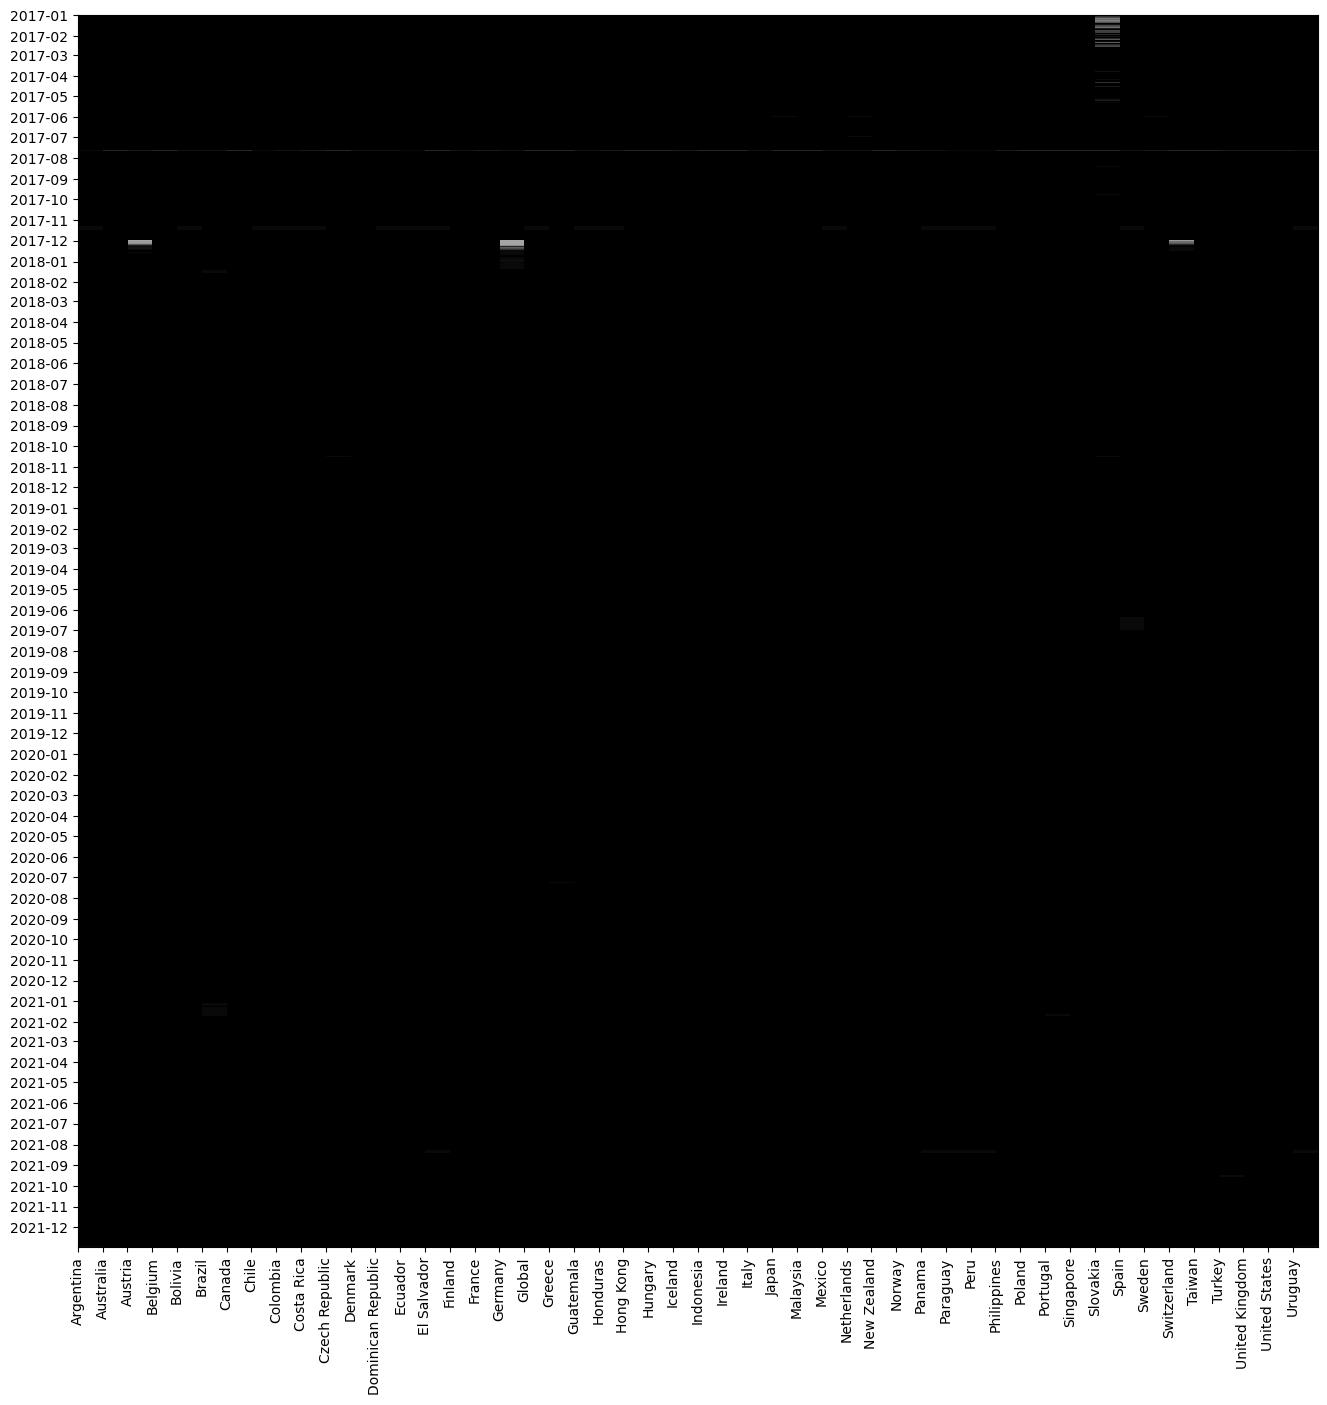

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

track_counts_by_region_pivot = track_counts_per_region_and_date.reset_index().pivot(
    columns=["region"], index="date", values="track_count"
)

plt.figure(figsize=(16, 16))
min_date = mdates.date2num(track_counts_by_region_pivot.index.min())
max_date = mdates.date2num(track_counts_by_region_pivot.index.max())

plt.xticks(ticks=list(range(len(track_counts_by_region_pivot.columns))), labels=track_counts_by_region_pivot.columns, rotation=90)

y_axis = plt.gca().yaxis
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_locator(mdates.MonthLocator())

plt.imshow(
    track_counts_by_region_pivot,
    aspect="auto",
    extent=[0, 50, max_date, min_date],
    cmap="Greys",
    interpolation="none",
)
plt.show()

We can also check for completeness by looking at the date column and comparing it with a daily date index from 2017 to 2022:

In [19]:
five_years = pd.date_range("2017-01-01", "2021-12-31")
missing_dates = five_years.difference(track_charts.set_index("date").index)
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

### Checking completeness of data by region

Let's do that for every region:

In [20]:
def get_missing_dates(date_col):
  return len(five_years.difference(date_col))

missing_dates_across_all_regions = track_charts.groupby(["region"]).date.apply(get_missing_dates).sum()
missing_dates_across_all_regions

0

We have some data for every day. What a relief!

## Exploring the Data

### Extract Global charts data

In [21]:
global_charts = track_charts[track_charts.region == "Global"].drop(columns="region")
global_charts

,date,rank,name,artist_name_1,artist_name_2,artist_name_3,streams,explicit,preview_url,album_type,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,genres
id,,,,,,,,,,,,,,,,,,,,,
5aAx2yezTd8zXrkmtKl66Z,2017-01-01,1,Starboy,The Weeknd,Daft Punk,NaN,3135625.0,True,NaN,album,...,0.000003,0.1340,0.535,186.054,230453.0,4.0,1Xyo4u8uXC1ZmMpatF05PJ,4tZwfgrHOc3mvqYlEYSvVi,NaN,"[canadian contemporary r&b, canadian pop, pop,..."
7BKLCZ1jbUBVqRi2FVlTVw,2017-01-01,2,Closer,The Chainsmokers,Halsey,NaN,3015525.0,False,https://p.scdn.co/mp3-preview/aacaac1614505dbb...,single,...,0.000000,0.1110,0.661,95.010,244960.0,4.0,69GGBxA162lTqCwzJG5jLp,26VFTg2z8YR0cCuwLzESi2,NaN,"[dance pop, edm, electropop, pop, pop dance, t..."
4pdPtRcBmOSQDlJ3Fk945m,2017-01-01,3,Let Me Love You,DJ Snake,Justin Bieber,NaN,2545384.0,False,NaN,album,...,0.000010,0.1220,0.142,199.864,205947.0,4.0,540vIaP2JwjQb9dm3aArA4,1uNFoZAHBGtllmzznpCI3s,NaN,"[dance pop, edm, electronic trap, pop, pop dan..."
5knuzwU65gJK7IF5yJsuaW,2017-01-01,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,Sean Paul,Anne-Marie,2356604.0,False,https://p.scdn.co/mp3-preview/afb53fb7e8ae5f5f...,single,...,0.000000,0.1800,0.742,101.965,251088.0,4.0,6MDME20pz9RveH9rEXvrOM,3Isy6kedDrgPYoTS1dazA9,1zNqDE7qDGCsyzJwohVaoX,"[dance pop, edm, pop, pop dance, post-teen pop..."
1xznGGDReH1oQq0xzbwXa3,2017-01-01,5,One Dance,Drake,Wizkid,Kyla,2259887.0,False,NaN,album,...,0.004230,0.3510,0.371,103.989,173987.0,4.0,3TVXtAsR1Inumwj472S9r4,3tVQdUvClmAT7URs9V3rsp,77DAFfvm3O9zT5dIoG0eIO,"[canadian hip hop, canadian pop, hip hop, rap,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1c4htMHiolERc0YJvZNdlc,2021-12-31,46,Vai Lá Em Casa Hoje,George Henrique & Rodrigo,Marília Mendonça,NaN,1680296.0,False,NaN,single,...,0.000000,0.9680,0.619,157.628,191524.0,4.0,3FlCKtwOEYQQYyGVEbxG2Z,1yR65psqiazQpeM79CcGh8,NaN,"[arrocha, sertanejo, sertanejo pop, sertanejo ..."
4gvrJnKCKIPiacNsWVQwEU,2021-12-31,47,love nwantiti (feat. Dj Yo! & AX'EL) - Remix,CKay,Dj Yo!,AX'EL,1675604.0,False,https://p.scdn.co/mp3-preview/165d7571df628c2c...,single,...,0.093800,0.0549,0.443,119.900,188369.0,3.0,048LktY5zMnakWq7PTtFrz,7iTLGcddv1bOPirdYJjKVy,5fUXK5m3BNwoRgTyKq8tnz,[afro r&b]
5wANPM4fQCJwkGd4rN57mH,2021-12-31,48,drivers license,Olivia Rodrigo,NaN,NaN,1674396.0,True,https://p.scdn.co/mp3-preview/3a145991602f4a73...,album,...,0.000014,0.1060,0.137,143.875,242013.0,4.0,1McMsnEElThX1knmY4oliG,NaN,NaN,[pop]


### Extract country charts, add additional metadata

In [22]:
countries_charts = track_charts[track_charts.region != "Global"].copy()
countries_charts.region = countries_charts.region.cat.remove_unused_categories()
countries_charts.rename(columns={"region": "country"}, inplace=True)
countries_charts

,country,date,rank,name,artist_name_1,artist_name_2,artist_name_3,streams,explicit,preview_url,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_id_1,artist_id_2,artist_id_3,genres
id,,,,,,,,,,,,,,,,,,,,,
6mICuAdrwEjh6Y6lroV2Kg,Argentina,2017-01-01,1,Chantaje (feat. Maluma),Shakira,Maluma,NaN,253019.0,False,https://p.scdn.co/mp3-preview/b7a66b261ebbe2aa...,...,0.000030,0.1590,0.907,102.034,195840.0,4.0,0EmeFodog0BfCgMzAIvKQp,1r4hJ1h58CWwUQe3MxPuau,NaN,"[colombian pop, dance pop, latin pop, reggaeto..."
7DM4BPaS7uofFul3ywMe46,Argentina,2017-01-01,2,Vente Pa' Ca (feat. Maluma),Ricky Martin,Maluma,NaN,223988.0,False,https://p.scdn.co/mp3-preview/21e38a8983daf1c3...,...,0.000017,0.1010,0.533,99.935,259196.0,4.0,7slfeZO9LsJbWgpkIoXBUJ,1r4hJ1h58CWwUQe3MxPuau,NaN,"[dance pop, latin pop, mexican pop, puerto ric..."
3AEZUABDXNtecAOSC1qTfo,Argentina,2017-01-01,3,Reggaetón Lento (Bailemos),CNCO,NaN,NaN,210943.0,False,https://p.scdn.co/mp3-preview/ced5c17cadb43603...,...,0.000000,0.1760,0.710,93.974,222560.0,4.0,0eecdvMrqBftK0M1VKhaF4,NaN,NaN,"[boy band, latin pop, reggaeton]"
6rQSrBHf7HlZjtcMZ4S4bO,Argentina,2017-01-01,4,Safari,J Balvin,Pharrell Williams,BIA,173865.0,False,NaN,...,0.000003,0.1260,0.555,180.044,205600.0,4.0,1vyhD5VmyZ7KMfW5gqLgo5,2RdwBSPQiwcmiDo9kixcl8,6veh5zbFpm31XsPdjBgPER,"[reggaeton, reggaeton colombiano, trap latino,..."
58IL315gMSTD37DOZPJ2hf,Argentina,2017-01-01,5,Shaky Shaky,Daddy Yankee,NaN,NaN,153956.0,False,NaN,...,0.000000,0.0631,0.873,88.007,234320.0,4.0,4VMYDCV2IEDYJArk749S6m,NaN,NaN,"[latin hip hop, reggaeton, trap latino]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7iXJg4IUyrWont5YSQrbKP,Uruguay,2021-12-31,46,Los Tragos,Reik,Maria Becerra,NaN,10707.0,False,https://p.scdn.co/mp3-preview/0ac0ba472608a3f8...,...,0.000001,0.1610,0.681,93.900,171001.0,4.0,0vR2qb8m9WHeZ5ByCbimq2,1DxLCyH42yaHKGK3cl5bvG,NaN,"[latin arena pop, latin pop, mexican pop, pop ..."
0XYZhJIcwKNjd0tjbSXwaQ,Uruguay,2021-12-31,47,Sabe,Nicki Nicole,Rauw Alejandro,NaN,10635.0,False,https://p.scdn.co/mp3-preview/87d78407ee48bdda...,...,0.000000,0.1720,0.767,93.063,177656.0,4.0,2UZIAOlrnyZmyzt1nuXr9y,1mcTU81TzQhprhouKaTkpq,NaN,"[argentine hip hop, r&b argentino, trap argent..."
39yyHtQ4tkjZzd8TfIBKQw,Uruguay,2021-12-31,48,"Morad: Bzrp Music Sessions, Vol. 47",Bizarrap,Morad,NaN,10491.0,False,https://p.scdn.co/mp3-preview/61d9340a0dc75302...,...,0.003390,0.1030,0.548,122.042,177583.0,4.0,716NhGYqD1jl2wI1Qkgq36,4az97MtWmBQ5Db3GfDh9j9,NaN,"[argentine hip hop, pop venezolano, trap argen..."


In [23]:
spotify_country_data = pd.read_csv(get_data_path("spotify_region_metadata.csv"))
spotify_country_data

,spotify_region,iso_alpha3,iso_alpha2,geo_region,geo_subregion
0,Argentina,ARG,AR,Americas,Latin America and the Caribbean
1,Australia,AUS,AU,Oceania,Australia and New Zealand
2,Austria,AUT,AT,Europe,Western Europe
3,Belgium,BEL,BE,Europe,Western Europe
4,Brazil,BRA,BR,Americas,Latin America and the Caribbean
5,Canada,CAN,CA,Americas,Northern America
6,Chile,CHL,CL,Americas,Latin America and the Caribbean
7,Colombia,COL,CO,Americas,Latin America and the Caribbean
8,Costa Rica,CRI,CR,Americas,Latin America and the Caribbean
9,Denmark,DNK,DK,Europe,Northern Europe


In [24]:
countries_charts = pd.merge(countries_charts.reset_index(), spotify_country_data, left_on="country", right_on="spotify_region")
countries_charts

,id,country,date,rank,name,artist_name_1,artist_name_2,artist_name_3,streams,explicit,...,time_signature,artist_id_1,artist_id_2,artist_id_3,genres,spotify_region,iso_alpha3,iso_alpha2,geo_region,geo_subregion
0,6mICuAdrwEjh6Y6lroV2Kg,Argentina,2017-01-01,1,Chantaje (feat. Maluma),Shakira,Maluma,NaN,253019.0,False,...,4.0,0EmeFodog0BfCgMzAIvKQp,1r4hJ1h58CWwUQe3MxPuau,NaN,"[colombian pop, dance pop, latin pop, reggaeto...",Argentina,ARG,AR,Americas,Latin America and the Caribbean
1,7DM4BPaS7uofFul3ywMe46,Argentina,2017-01-01,2,Vente Pa' Ca (feat. Maluma),Ricky Martin,Maluma,NaN,223988.0,False,...,4.0,7slfeZO9LsJbWgpkIoXBUJ,1r4hJ1h58CWwUQe3MxPuau,NaN,"[dance pop, latin pop, mexican pop, puerto ric...",Argentina,ARG,AR,Americas,Latin America and the Caribbean
2,3AEZUABDXNtecAOSC1qTfo,Argentina,2017-01-01,3,Reggaetón Lento (Bailemos),CNCO,NaN,NaN,210943.0,False,...,4.0,0eecdvMrqBftK0M1VKhaF4,NaN,NaN,"[boy band, latin pop, reggaeton]",Argentina,ARG,AR,Americas,Latin America and the Caribbean
3,6rQSrBHf7HlZjtcMZ4S4bO,Argentina,2017-01-01,4,Safari,J Balvin,Pharrell Williams,BIA,173865.0,False,...,4.0,1vyhD5VmyZ7KMfW5gqLgo5,2RdwBSPQiwcmiDo9kixcl8,6veh5zbFpm31XsPdjBgPER,"[reggaeton, reggaeton colombiano, trap latino,...",Argentina,ARG,AR,Americas,Latin America and the Caribbean
4,58IL315gMSTD37DOZPJ2hf,Argentina,2017-01-01,5,Shaky Shaky,Daddy Yankee,NaN,NaN,153956.0,False,...,4.0,4VMYDCV2IEDYJArk749S6m,NaN,NaN,"[latin hip hop, reggaeton, trap latino]",Argentina,ARG,AR,Americas,Latin America and the Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472525,7iXJg4IUyrWont5YSQrbKP,Uruguay,2021-12-31,46,Los Tragos,Reik,Maria Becerra,NaN,10707.0,False,...,4.0,0vR2qb8m9WHeZ5ByCbimq2,1DxLCyH42yaHKGK3cl5bvG,NaN,"[latin arena pop, latin pop, mexican pop, pop ...",Uruguay,URY,UY,Americas,Latin America and the Caribbean
4472526,0XYZhJIcwKNjd0tjbSXwaQ,Uruguay,2021-12-31,47,Sabe,Nicki Nicole,Rauw Alejandro,NaN,10635.0,False,...,4.0,2UZIAOlrnyZmyzt1nuXr9y,1mcTU81TzQhprhouKaTkpq,NaN,"[argentine hip hop, r&b argentino, trap argent...",Uruguay,URY,UY,Americas,Latin America and the Caribbean
4472527,39yyHtQ4tkjZzd8TfIBKQw,Uruguay,2021-12-31,48,"Morad: Bzrp Music Sessions, Vol. 47",Bizarrap,Morad,NaN,10491.0,False,...,4.0,716NhGYqD1jl2wI1Qkgq36,4az97MtWmBQ5Db3GfDh9j9,NaN,"[argentine hip hop, pop venezolano, trap argen...",Uruguay,URY,UY,Americas,Latin America and the Caribbean
4472528,5eyO0n1HiiSWdGaaSoK731,Uruguay,2021-12-31,49,2:50 Remix,MYA,TINI,Duki,10388.0,False,...,4.0,5Rj6rNR8zIlUUDCs1OyPmW,7vXDAI8JwjW531ouMGbfcp,1bAftSH8umNcGZ0uyV7LMg,"[latin pop, pop argentino, argentine hip hop, ...",Uruguay,URY,UY,Americas,Latin America and the Caribbean


In [25]:
countries_charts[~countries_charts.id.duplicated(keep='first')].isrc_agency.value_counts()

RIAA                                         8407
SCPP                                         2951
BVMI                                         2398
FIMI                                         2120
IFPI Finland                                 1692
PPL UK                                       1581
SENA                                         1507
GRAMEK DK                                    1468
IFPI Sweden                                  1418
ZPAV                                         1191
Pro-música Brazil                             819
INTERGRAM                                     720
TuneCore                                      714
RIT                                           643
IFPI Greece                                   623
Gramo                                         588
MU-YAP                                        529
AGEDI                                         468
RIAJ                                          464
International ISRC Registration Authority     435


In [26]:
countries_charts[~countries_charts.id.duplicated(keep='first')].isrc_territory.value_counts()

United States    8407
France           2951
Germany          2398
Italy            2120
Finland          1692
                 ... 
Jamaica             1
Ukraine             1
Malta               1
Paraguay            1
Armenia             1
Name: isrc_territory, Length: 63, dtype: int64

In [27]:
set(countries_charts.country) - set(countries_charts.isrc_territory)

{'Bolivia',
 'Costa Rica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Guatemala',
 'Honduras',
 'Hong Kong',
 'Taiwan'}

### Identifying the songs that reached number 1 in most countries

In [28]:
number_ones = (
    countries_charts[countries_charts["rank"] == 1]
    .reset_index()
    .drop_duplicates(subset=["id", "country"])
    .groupby(["id", "name", "artist_name_1"])
    .country.count()
    .sort_values(ascending=False)
)
number_ones[:10]


id                      name                                artist_name_1
4aWmUDTfIPGksMNLV2rQP2  Despacito (Featuring Daddy Yankee)  Luis Fonsi       49
5CtI0qwDJkDQGwXD1H1cLb  Despacito - Remix                   Luis Fonsi       46
7qiZfU4dY1lWllzX7mPBI3  Shape of You                        Ed Sheeran       35
0bYg9bo50gSsH3LtXe2SQn  All I Want for Christmas Is You     Mariah Carey     32
2G7V7zsVDxg1yRsu7Ew9RJ  In My Feelings                      Drake            31
0gplL1WMoJ6iYaPgMCL0gX  Easy On Me                          Adele            30
0TK2YIli7K1leLovkQiNik  Señorita                            Shawn Mendes     27
1rgnBhdG2JDFTbYkYRZAku  Dance Monkey                        Tones And I      25
6v3KW9xbzN5yKLt9YKDYA2  Señorita                            Shawn Mendes     25
5PjdY0CKGZdEuoNab3yDmX  STAY (with Justin Bieber)           The Kid LAROI    25
Name: country, dtype: int64

#### Development of average chart song length from 2017 to 2021

Several media reports claim that Pop Songs are becoming shorter and shorter due to the influence of Spotify's algorithm (see for example [this](https://www.prsformusic.com/m-magazine/features/song-length-the-spotify-effect#:~:text=Pop%20songs%20are%20one%20minute,Are%20algorithms%20to%20blame%3F&text=20%20May%202019-,Pop%20songs%20are%20one%20minute%20and%2013%20seconds%20shorter%20on,they%20were%2020%20years%20ago.) article). Can we observe that trend of decreasing average song length also when looking at the length of Spotify Chart songs from 2017 to 2021?

In [29]:
song_lengths = (
    global_charts.reset_index()
    .drop_duplicates(subset=["id", "date"])
    .groupby(["date"])
    .duration_ms.median()
) / 1000 # convert milliseconds to seconds
song_lengths.name = "song duration (s)"
song_lengths


date
2017-01-01    211.2020
2017-01-02    210.6150
2017-01-03    210.6150
2017-01-04    210.2600
2017-01-05    210.2600
                ...   
2021-12-27    202.8995
2021-12-28    202.8995
2021-12-29    202.8995
2021-12-30    201.3875
2021-12-31    195.4750
Name: song duration (s), Length: 1826, dtype: float64

In [30]:
import seaborn as sns

Text(0.5, 1.0, 'Median song lengths for Spotify Daily Top 50 (global)')

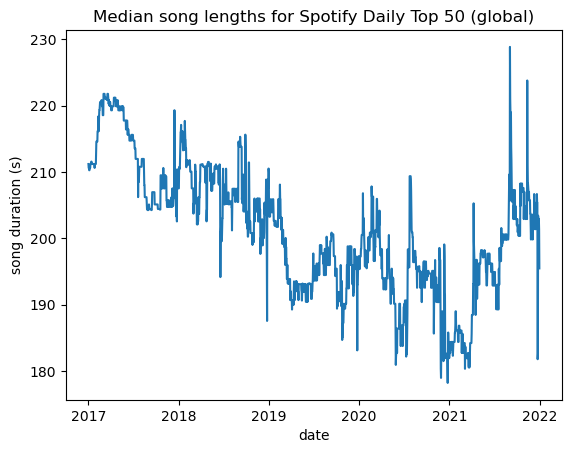

In [31]:
sns.lineplot(song_lengths)
plt.title("Median song lengths for Spotify Daily Top 50 (global)")

### Countries with most songs streamed

In [32]:
streams = countries_charts.groupby(["country", "date"]).streams.sum().sort_values(ascending=False).reset_index().set_index("date")
streams

,country,streams
date,,
2021-09-03,United States,107186728.0
2018-06-29,United States,104387689.0
2020-12-25,United States,92143610.0
2021-12-25,United States,85469959.0
2018-06-30,United States,82462231.0
...,...,...
2017-01-01,Greece,59509.0
2017-01-01,Iceland,58313.0
2017-01-05,Slovakia,54583.0


In [72]:
total_streams_per_country = streams.groupby("country").streams.sum().sort_values(ascending=False)
total_streams_per_country

country
United States         6.664872e+10
Brazil                2.776871e+10
Mexico                2.287400e+10
Germany               2.077738e+10
United Kingdom        1.897820e+10
Spain                 1.547413e+10
Italy                 1.358924e+10
France                1.168422e+10
Argentina             1.104077e+10
Australia             1.019892e+10
Netherlands           1.018208e+10
Philippines           1.010755e+10
Chile                 9.869191e+09
Canada                9.327649e+09
Indonesia             8.255808e+09
Sweden                8.015910e+09
Turkey                6.406908e+09
Japan                 5.507563e+09
Norway                4.880355e+09
Peru                  4.527544e+09
Poland                4.300430e+09
Denmark               3.565919e+09
Colombia              3.407812e+09
Finland               2.654623e+09
Ireland               2.209751e+09
New Zealand           2.074481e+09
Malaysia              2.043456e+09
Belgium               2.013845e+09
Singapore   

<AxesSubplot: xlabel='country'>

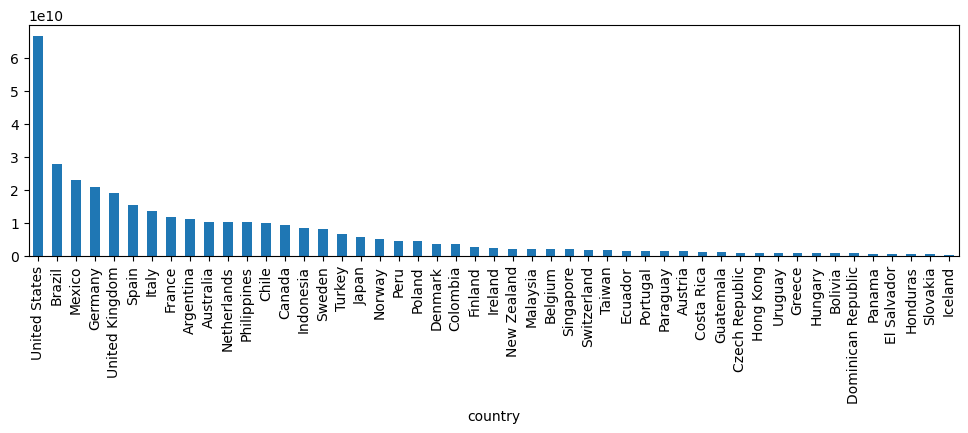

In [73]:
plt.figure(figsize=(12, 3))
total_streams_per_country.plot.bar()#, order=total_streams_per_country.sort_values())

In [79]:
normalized_streams = streams.groupby("country").apply(lambda x: x.streams / x.streams.max()).reset_index().set_index("date")
normalized_streams.join(spotify_country_data)

,country,streams
date,,
2021-01-01,Argentina,1.000000
2020-12-25,Argentina,0.950476
2020-12-24,Argentina,0.933743
2021-08-07,Argentina,0.931384
2020-12-31,Argentina,0.928587
...,...,...
2018-05-01,Uruguay,0.284997
2017-07-16,Uruguay,0.280009
2018-07-01,Uruguay,0.271913


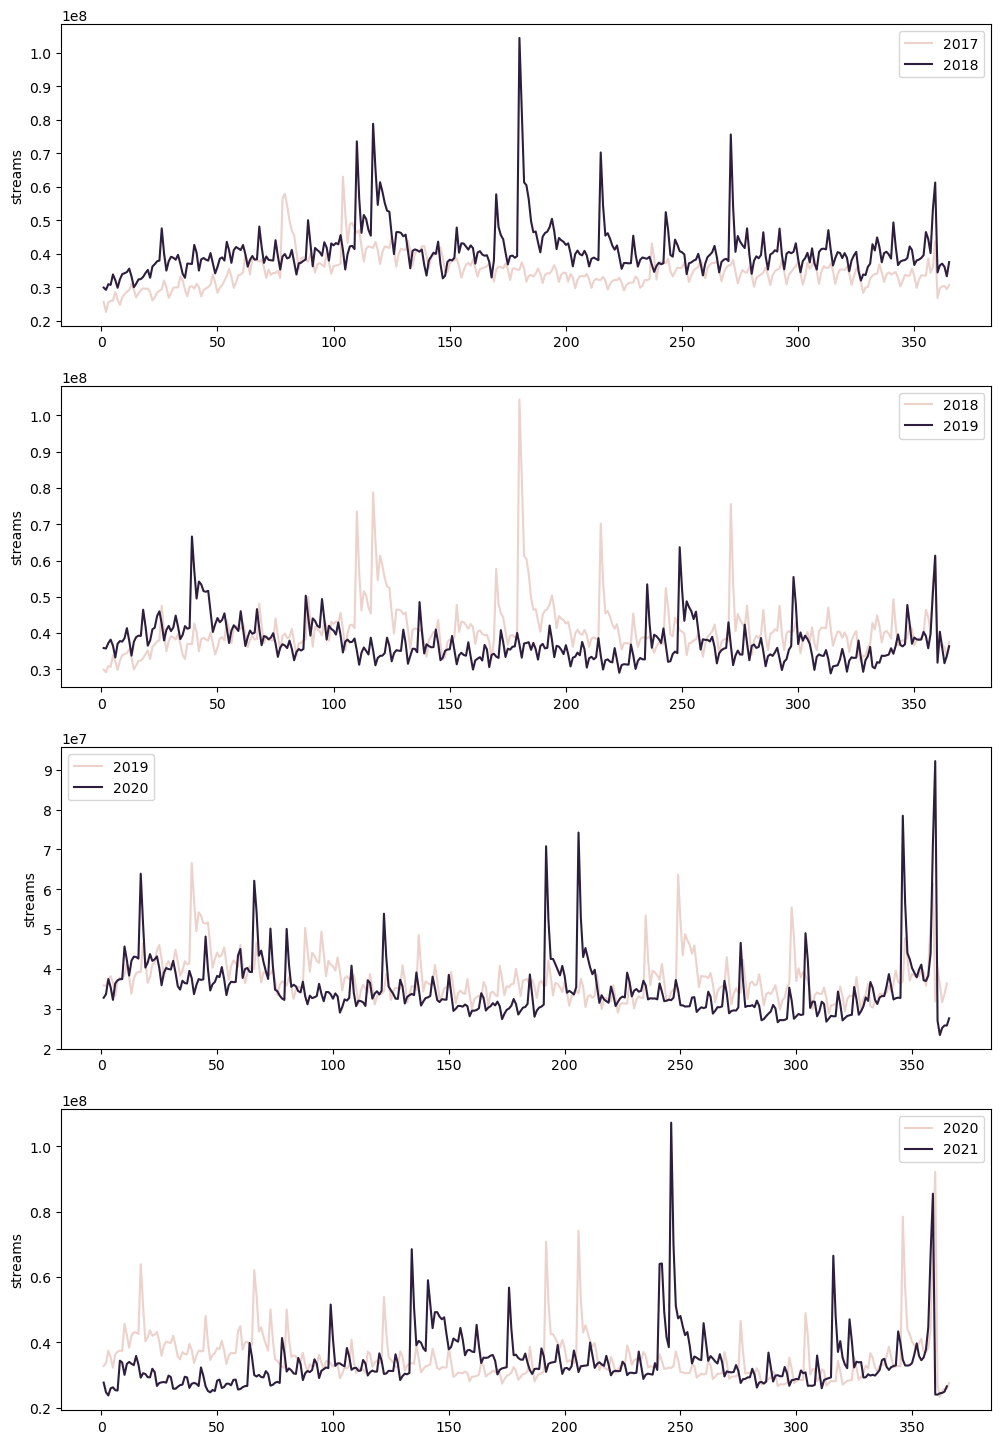

In [39]:
import numpy as np

def plot_year_by_year_comparisons(streams):
    years = list(range(2018, 2022))
    fig, axs = plt.subplots(len(years), 1, figsize=(12, 18))
    for i, ax in enumerate(axs.ravel()):
        
        year = years[i]
        prev_year = year - 1
        date_range = pd.date_range(f"{prev_year}-01-01", f"{year}-12-31")
        cur_streams = streams.reindex(date_range)#loc[date_range]
        #cur_streams.loc[pd.date_range(f"{year}-02-01", f"{year}-02-28"), "streams"] = np.nan
        cur_streams.streams.fillna(np.inf, inplace=True)
        sns.lineplot(
            x=cur_streams.index.dayofyear,
            y=cur_streams["streams"],
            hue=cur_streams.index.year,
            ax=ax,
        )
    plt.show()

us_streams = streams[streams.country == "United States"]
plot_year_by_year_comparisons(us_streams)
